# Project 2: Initial exploration and data visualization
*University of Ljubljana, Faculty for computer and information science* <br />
*Course: Introduction to data science, 2022-2023*

Stefanela, Stevanović

## Environment setup

- Libraries needed to run this notebook are: pandas, numpy and matplotlib.

- Run the following commands to set up the environment:
 
> conda create -n project_2 python=3.9 pandas numpy matplotlib

> conda activate project_2

- Or use project2_env.yml file from the same GitHub repository to setup the enviroment with command:

> conda create -f project2_env.yml`

In [2]:
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Exploration and data visualization

## Loading and preparing the data

In [2]:
claim_data = pd.read_csv('claim_data.csv')

# removing rows without policy_id information and redundant columns
claim_data.dropna(subset = ['policy_id'], inplace = True)
claim_data.drop(['claim_expense','claim_paid','claim_recovered','claim_reserved','claim_status','claim_id'], inplace = True, axis = 1)
claim_data.reset_index(drop = True, inplace = True)

# removing data from 90s
for i in range(0, len(claim_data['date_open'])):
    if claim_data['date_open'][i][1] == '9':
        claim_data.drop([i], inplace = True, axis = 0)

claim_data.reset_index(drop = True, inplace = True)
claim_data

,claim_total_value,date_closed,date_open,event_date,policy_id,customer_id
0,72802,2018-12-20,2003-02-10,2003-01-24,10937855.0,1554606.0
1,1000810,2020-01-28,2002-12-31,2002-12-25,5793869.0,623343.0
2,78,2020-10-07,2018-08-06,2002-11-09,5251602.0,526177.0
3,450,NaN,2020-08-21,2020-01-12,10275807.0,1435549.0
4,3392,2019-04-02,2004-07-29,2004-07-01,10015834.0,1389780.0
...,...,...,...,...,...,...
683627,242,2020-11-04,2020-10-21,2019-07-16,14378432.0,2171276.0
683628,1421,2020-10-30,2020-09-11,2020-08-20,14378432.0,2171276.0
683629,1861,2020-07-02,2020-05-22,2020-05-21,12540784.0,1840848.0
683630,1761,2020-11-30,2020-07-14,2020-07-06,7457610.0,927297.0


In [4]:
customer_data = pd.read_csv('customer_data.csv')

# removing redundant columns
customer_data.drop(['household_id', 'household_role', 'date_of_birth'], inplace = True, axis = 1)

customer_data

FileNotFoundError: [Errno 2] No such file or directory: 'customer_data.csv'

In [4]:
policy_data = pd.read_csv('policy_data.csv')

# removing rows without customer_id 
policy_data.dropna(subset = ['customer_id'], inplace = True)

# removing redundant columns
policy_data.drop(['first_end_date', 'cancellation_or_end_date','sales_channel','line','status','premium','product_name'], inplace = True, axis = 1)

policy_data.reset_index(drop = True, inplace = True)
policy_data

C:\Users\Asus\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (1,2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,underwriting_date,policy_id,customer_id,product_group
0,NaN,0,697.0,NaN
1,NaN,1,1499.0,0.0
2,NaN,2,2710.0,NaN
3,NaN,3,4483.0,NaN
4,NaN,4,7920.0,NaN
...,...,...,...,...
14900405,2020-05-20,15279990,2333028.0,6.0
14900406,2019-03-27,15279991,2333029.0,51.0
14900407,2020-03-27,15279992,2333029.0,51.0
14900408,2018-03-27,15279993,2333029.0,51.0


## Data statistics

### Statistics 1 - In which months do events happen most often?

In [6]:
# defining new dataframe claim, which is equal to claim_data dataframe with removed claims with no event_date information 
claim = claim_data.dropna(subset = ['event_date'])
claim.reset_index(drop = True, inplace = True)

# calculating number of events per month 
event_month = [0]*12

for i in range(0,len(claim['event_date'])):
    
    if claim['event_date'][i][5] == '0':
        
        for j in range (1,10):
            
            if claim['event_date'][i][6] == '{}'.format(j):
                event_month[j-1] += 1
            
    if claim['event_date'][i][5] == '1':
        
        for j in range(0,3):
            
            if claim['event_date'][i][6] == '{}'.format(j):
                event_month[j+9] += 1

# calculating total number of events in 2000-2020            
sum_event = 0
for i in event_month:
    sum_event += i

# calculating the percentage of events that occured in each month
event_perc = [(i/sum_event)*100 for i in event_month]    
    
print(event_month)
print(event_perc)

[56353, 55096, 37048, 30335, 50296, 65366, 75351, 54202, 65635, 71918, 66091, 55940]
[8.243189673961538, 8.059318550504585, 5.41929783757612, 4.437335346115082, 7.3571853821725455, 9.561590975248343, 11.022174243122386, 7.928546247902743, 9.600939688223619, 10.520002750021575, 9.667642339215162, 8.182776965936302]


### Statistics 2 - In which days of the week do events happen most often?

In [7]:
# finding which day in the week is each date in event_date
week_days = []
for i in range(0,len(claim['event_date'])):
    dt = datetime.strptime(claim['event_date'][i], "%Y-%m-%d")
    day = dt.weekday()
    week_days.append(day)

# calculating number of events in each day of the week
num_of_days = [0]*7
for i in range(0,len(week_days)):
    for j in range(0,8):
        if week_days[i] == j:
            num_of_days[j] += 1

# calculating the percentage of events that occured in each day of the week
days_perc = [(i/sum_event)*100 for i in num_of_days]

print(num_of_days)
print(days_perc)

[121329, 112627, 110780, 107736, 116278, 71958, 42923]
[17.747732329282904, 16.47482340619428, 16.204648414129842, 15.759378963212612, 17.008883447356833, 10.525853859757676, 6.278679580065854]


### Statistics 3 - Which 30 product groups have the most underwtitten policies?

In [225]:
region_product = pd.merge(customer_data,policy_data , how='inner', left_on = 'customer_id', right_on = 'customer_id')
region_product.drop(['customer_id','gender','policy_id','customer_type','underwriting_date'], inplace = True, axis = 1)
region_product.dropna(subset = ['country_part', 'product_group'], inplace = True)
region_product.reset_index(drop = True, inplace = True)

# finding top 30 best selling products
acb = region_product.copy()
naj = acb.groupby(['product_group']).count()
naj['occurancies'] = naj['country_part']
naj.drop(['country_part'], inplace = True, axis = 1)
naj = naj.sort_values(by='occurancies', ascending=False)
top30 = naj[:76]
top30


,occurancies
product_group,
6.0,8193385
51.0,2390541
61.0,832348
2.0,352611
1.0,313895
75.0,241626
5.0,209786
10.0,185657
9.0,181008


### Statistics 4 - Does the number of events per product group differ in different parts of the country?

In [226]:
sales = region_product.groupby(['product_group','country_part']).size()
top_sales_mat = np.zeros((6,30))
k = 0
flag = 0
labels_sale = []
for i in range(159):
    try:
        p = top30['occurancies'][i]
        top_sales_mat[0][k] = sales[i]['centre']
        flag += 1
    except KeyError:
        pass
    try:
        p = top30['occurancies'][i]
        top_sales_mat[1][k] = sales[i]['insular']
        flag += 1
    except KeyError:
        pass
    try:
        p = top30['occurancies'][i]
        top_sales_mat[2][k] = sales[i]['north_east']
        flag += 1
    except KeyError:
        pass
    try:
        p = top30['occurancies'][i]
        top_sales_mat[3][k] = sales[i]['north_west']
        flag += 1
    except KeyError:
        pass
    try:
        p = top30['occurancies'][i]
        top_sales_mat[4][k] = sales[i]['south']
        flag += 1
    except KeyError:
        pass
    try:
        p = top30['occurancies'][i]
        top_sales_mat[5][k] = sales[i]['other']
        flag += 1
    except KeyError:
        pass
    if flag > 0:
        k += 1
        flag = 0
        labels_sale.append(i)

In [227]:
claim_region = pd.merge(claim_data,customer_data , how='inner', left_on = 'customer_id', right_on = 'customer_id')
claim_region_product = pd.merge(claim_region,policy_data , how='inner', left_on = 'policy_id', right_on = 'policy_id')
columns_to_drop = ['date_closed','date_open', 'policy_id', 'customer_type', 'customer_id_x','customer_id_y','gender','underwriting_date']
claim_region_product.drop(columns_to_drop, inplace = True, axis = 1)
claim_region_product.dropna(subset = ['country_part', 'product_group'], inplace = True)
claim_region_product.reset_index(drop = True, inplace = True)

occ = claim_region_product.groupby(['product_group','country_part']).size()

events_mat = np.zeros((6,30))
labels = []
k = 0
        
for i in labels_sale:
    try:
        events_mat[0][k] = occ[i]['centre'] 
        flag += 1
    except KeyError:
        pass
    try:
        events_mat[1][k] = occ[i]['insular']
        flag += 1
    except KeyError:
        pass
    try:
        events_mat[2][k] = occ[i]['north_east']
        flag += 1
    except KeyError:
        pass
    try:
        events_mat[3][k] = occ[i]['north_west']
        flag += 1
    except KeyError:
        pass
    try:
        events_mat[4][k] = occ[i]['south']
        flag += 1
    except KeyError:
        pass
    try:
        events_mat[5][k] = occ[i]['other']
        flag += 1
    except KeyError:
        pass
    k=k+1
    labels.append(str(i))

In [267]:
perc = np.zeros((6,30))
for i in range(6):
    for j in range(30):
        perc[i][j] = events_mat[i][j]/top_sales_mat[i][j]

### Statistics 5 - How does month of the year affect the number of events happening for different product groups? 

In [229]:
event_product = pd.merge(claim_data, policy_data , how='inner', left_on = 'policy_id', right_on = 'policy_id')
event_product.drop(['claim_total_value','date_open', 'date_closed', 'customer_id_x', 'customer_id_y', 'underwriting_date'], inplace = True, axis = 1)
event_product.dropna(subset = ['event_date', 'product_group'], inplace = True)
event_product.reset_index(drop = True, inplace = True)

# creating a new column that contains only a month of the event
month = []
for i in event_product['event_date']:
    dt = datetime.strptime(i, "%Y-%m-%d")
    month.append(dt.month)

event_product['event_month'] = month

event_product.drop(['event_date', 'policy_id'], inplace = True, axis = 1)

ep = event_product.groupby(['product_group','event_month']).size()

In [230]:
# counting number of events in each month for every product group
event_mat = np.zeros((30,12))
k = -1
labels_i = []
for i in range(159):
    flag = 0
    try:
        p = top30['occurancies'][i]
        k = k+1
        labels_i.append(str(i))
        flag = 1
    except KeyError:
        pass
    if flag:
        for j in range(12):
            try:
                event_mat[k][j] = ep[i][j+1]
            except KeyError:
                pass

In [231]:
# calculating number of underwritten policies for every product_group
pr_occ = policy_data.groupby(['product_group']).size()
pr_policies = []
top30_pr = [int(i) for i in labels_i]
for i in top30_pr:
    pr_policies.append(pr_occ[i])

# dividing  each product array in the event_mat with number of underwritten policies for that product
matrix = np.zeros((30,12))
for i in range(0,30):
    for j in range(0,12):
        x = event_mat[i][j]/pr_policies[i]
        matrix[i][j] = x

In [263]:
matrix = np.zeros((30,12))
for i in range(0,30):
    for j in range(0,12):
        x = event_mat[i][j]/pr_policies[i]
        matrix[i][j] = x
        
matrix_t = matrix.transpose()

## Data visualizations

### Visualization 1 - In which months do events happen most often?

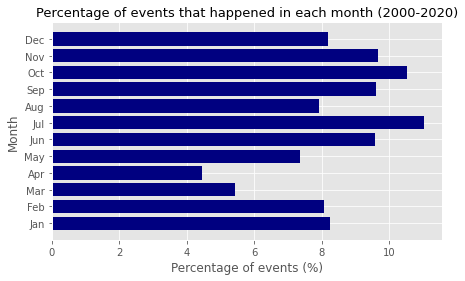

In [8]:
plt.style.use('ggplot')

x = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

fig, ax = plt.subplots(figsize=(7, 4))
plt.barh(x, event_perc, color = 'navy')

plt.ylabel('Month')
plt.xlabel('Percentage of events (%)')
plt.title('Percentage of events that happened in each month (2000-2020)', fontsize = 13)
plt.show()

### Visualization 2 - In which days of the week do events happen most often?

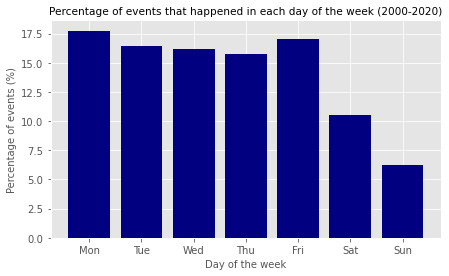

In [13]:
plt.style.use('ggplot')

days = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

fig, ax = plt.subplots(figsize=(7, 4))
plt.bar(days, days_perc, color = 'navy')

plt.xlabel('Day of the week', fontsize = 10)
plt.ylabel('Percentage of events (%)', fontsize = 10)
plt.title('Percentage of events that happened in each day of the week (2000-2020)', fontsize = 10.5)
plt.show()

### Visualization 3 - Which 30 product groups have the most underwtitten policies?

Text(0.5, 1.0, 'Underwritten policies for 30 best-selling product groups (2000-2020)')

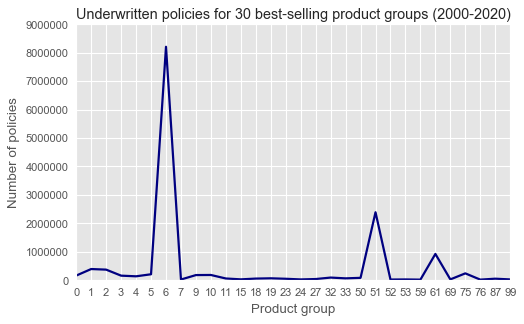

In [250]:
fig, ax = plt.subplots(figsize=(7,4))
ax.set_xticks(np.arange(0,30))
plt.plot(pr_policies, color = 'navy')

ax.set_xticklabels(labels_i)

plt.xlabel('Product group')
plt.ylabel('Number of policies')
plt.title('Underwritten policies for 30 best-selling product groups (2000-2020)', fontsize = 13)

### Visualization 4 - Does the number of events per product group differ in different parts of the country?

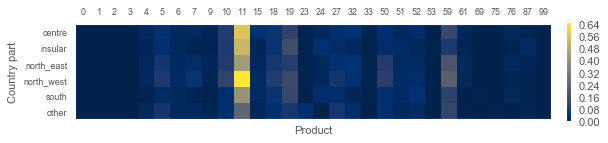

In [287]:
regions = ['centre','insular','north_east','north_west','south','other']
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
cax = ax.matshow(perc, cmap=matplotlib.cm.cividis)
fig.colorbar(cax,fraction=0.01, pad=0.03)

ax.set_yticks(np.arange(0,6))
ax.set_xticks(np.arange(0,30))
plt.xlabel('Product', fontsize=10)
plt.ylabel('Country part', fontsize=10)

ax.set_yticklabels(['centre','insular','north_east','north_west','south','other'])
ax.set_xticklabels(labels)
ax.grid(False)

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.show()

### Visualization 5 - How does month of the year affect the number of events happening for different product groups? 

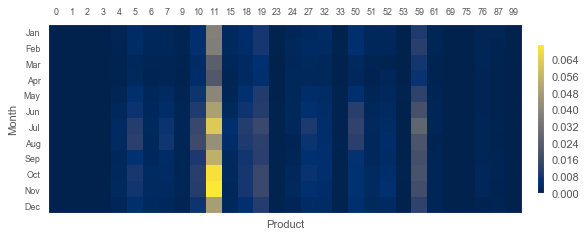

In [299]:
x = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
cax = ax.matshow(matrix_t, cmap=matplotlib.cm.cividis)
fig.colorbar(cax,fraction=0.015, pad=0.03)

ax.set_yticks(np.arange(0,12))
ax.set_xticks(np.arange(0,30))
ax.grid(False)
plt.xlabel('Product', fontsize=10)
plt.ylabel('Month', fontsize=10)

ax.set_yticklabels(x)
ax.set_xticklabels(labels_i)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.show()